In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import logging
import plot_utils as ut
import umap.umap_ as umap

# Add custom module path
sys.path.append('<path_of_GNEprop_repo>')

# Set random seed and logging level
SEED = 42
logging.getLogger().setLevel(logging.INFO)

# Enable autoreload for Jupyter Notebook
%load_ext autoreload
%autoreload 2

# 1. Load Data

In [ ]:
'load smiles df'

data_dir = '<dir_of_your_enamine_dataset>'
path = os.path.join(data_dir, '<name_of_your_enamine_dataset')
smile_df = pd.read_csv(path)
print(len(smile_df))

In [3]:
smile_df.head()

,SMILES,mw,tpsa,logp,hbd,hba,rotbonds,lipinski,lipinski_1,ghose,veber,rule3,reos,drug-like,antibiotic-like
0,B[P@]1(=O)OC[C@H]2O[C@@H](n3cnc4c(N)ncnc43)[C@...,666.059,290.18,-2.81723,7,21,2,False,False,False,False,False,False,False,False
1,Bc1cnc(N=c2cc(C)[nH]c(C)c2)c(C(=O)OC)n1,270.101,80.23,-0.30106,1,6,2,True,True,False,True,False,True,True,False
2,Bc1cnc(NS(=O)(=O)CCCCC(=O)OC)c(C(=O)OC)n1,343.170,124.55,-1.39340,1,9,8,True,True,False,True,False,True,False,False
3,Bc1cnc(NS(=O)(=O)c2cc(Br)cc(C(F)(F)F)c2)c(C(=O...,452.017,98.25,1.10370,1,7,4,True,True,True,True,False,True,False,False
4,Bc1cnc(NS(=O)(=O)c2ccc3c(c2)CCO3)c(C(=O)OC)n1,347.161,107.48,-0.74270,1,8,4,True,True,False,True,False,True,True,False


# 2. Generate Representations

In [4]:
'define ckp_dir'
ckp_dir = '<dir_of_unsupervised_checkpoint>'

In [ ]:
%%time

'generate gne_prop repr'

reprs_1 = ut.gen_repr(smile_df, ckp_dir, return_mol=False, use_gpu=False, repr_type='gne')[0]

In [7]:
'save Morgan repr'
np.save(os.path.join(data_dir, 'enamine_unsupervised.npy'), reprs_1)

In [6]:
%%time

'generate morgan repr'

reprs_2 = ut.gen_repr(smile_df, ckp_dir, return_mol=True, repr_type='morgan')[0]

100%|████████████████████████████████████████████████| 1000000/1000000 [03:39<00:00, 4565.84it/s]
INFO:root:Generating molecules...
100%|███████████████████████████████████████████████| 1000000/1000000 [01:26<00:00, 11605.48it/s]


CPU times: user 5min 21s, sys: 3.82 s, total: 5min 25s
Wall time: 5min 26s


In [8]:
'save Morgan repr'
np.save(os.path.join(data_dir, 'enamine_mrg_repr.npy'), reprs_2)

# 3. Generate UMAP 2d Embedings

In [9]:
# unsupervised repr emb
path = os.path.join(data_dir, 'enamine_unsupervised.npy')
reprs = np.load(path)

logging.info('array shape is {}'.format(reprs.shape))
logging.info('creating umap embeddings...')

reducer = umap.UMAP(random_state=SEED, metric='euclidean')
embedding = reducer.fit_transform(reprs)

logging.info('saving the meta emb dataframe...')
np.save(os.path.join(data_dir, 'enamine_unsupervised_umap_2d.npy'), embedding)

In [10]:
# morgan emb
path = os.path.join(data_dir, 'enamine_mrg_repr.npy')
reprs = np.load(path)

logging.info('array shape is {}'.format(reprs.shape))
logging.info('creating umap embeddings...')

reducer = umap.UMAP(random_state=SEED, metric='jaccard')
embedding = reducer.fit_transform(reprs)

logging.info('saving the meta emb dataframe...')
np.save(os.path.join(data_dir, 'enamine_mrg_umap_2d.npy'), embedding)

# 4. Generate UMAP Plot

## 4.1 Morgan

In [11]:
path = os.path.join(data_dir, 'enamine_mrg_umap_2d.npy')
reprs = np.load(path)

prop_df = smile_df

### 4.1.1. space vs. properties

Using existed 2d representations


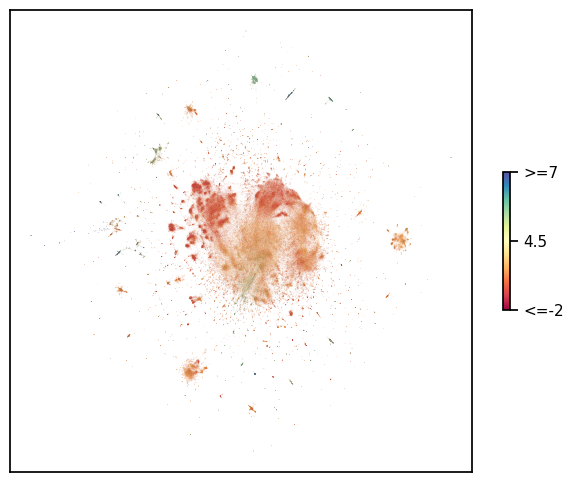

In [ ]:
props = ['logp']
title = ''

for i in range(len(props)):
    ut.plot_repr_multi_prop(reprs, prop_df, [props[i]], mode='quanti',
                            nrows=1, ncols=1, fname=None, clean=False, 
                            s=0.02, title=title, dpi=600)

### 4.1.2 Space vs. filters

Using existed 2d representations


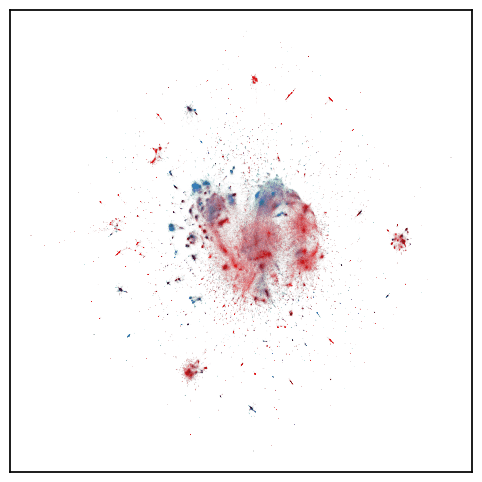

In [11]:
props = ['antibiotic-like']
title = ''

for i in range(len(props)):
    ut.plot_repr_multi_prop(reprs, prop_df, [props[i]], mode='quali',
                            nrows=1, ncols=1,
                            fname=None, clean=False, s=0.01, 
                            title=title, dpi=600)


## 4.2 Unsupervised

In [50]:
path = os.path.join(data_dir, 'enamine_unsupervised_umap_2d.npy')
reprs = np.load(path)

prop_df = smile_df

### 4.2.1. space vs. properties

Using existed 2d representations


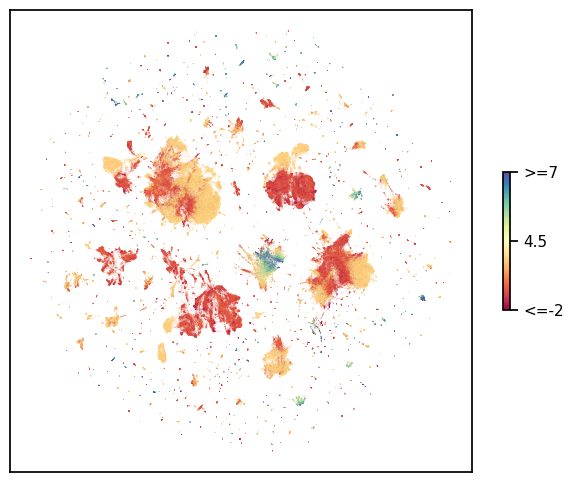

In [54]:
props = ['logp']
title = ''

for i in range(len(props)):
    ut.plot_repr_multi_prop(reprs, prop_df, [props[i]], mode='quanti',
                            nrows=1, ncols=1, fname=None, clean=False, 
                            s=0.1, title=title, dpi=600)

### 4.2.2 Space vs. filters

Using existed 2d representations


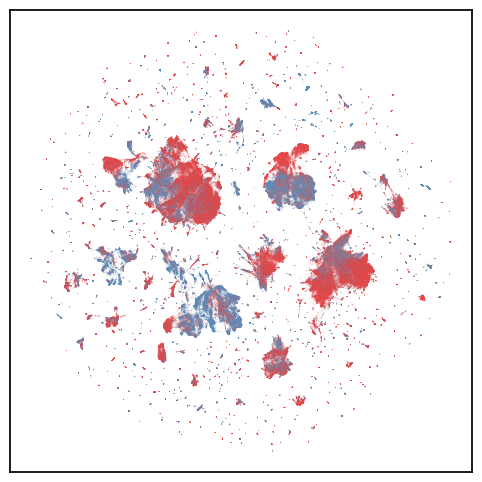

In [55]:
props = ['antibiotic-like']
title = ''

for i in range(len(props)):
    ut.plot_repr_multi_prop(reprs, prop_df, [props[i]], mode='quali',
                            nrows=1, ncols=1,
                            fname=None, clean=False, s=0.1, 
                            title=title, dpi=600)